In [1]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

csv_path = "/root/dataset/original_dataset/annotations/annotations.csv"
dataset_img_path = "/root/dataset/original_dataset/images"
data = pd.read_csv(csv_path).values.tolist()

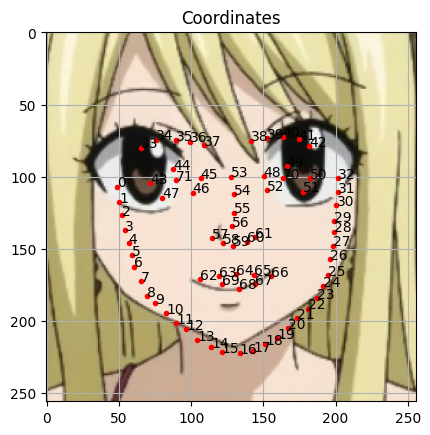

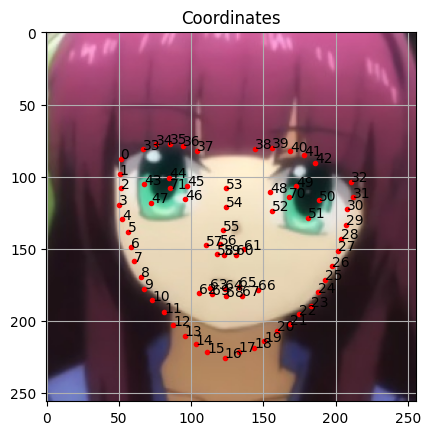

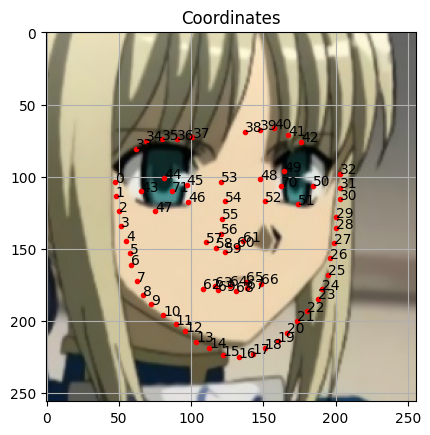

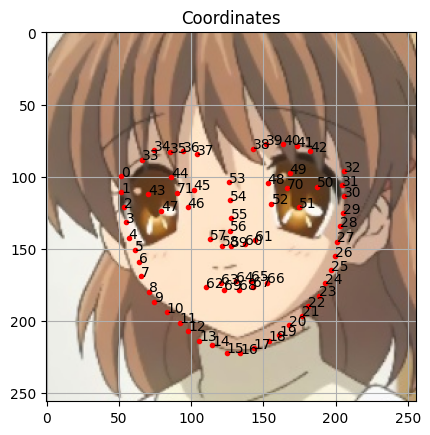

FileNotFoundError: [Errno 2] No such file or directory: '/root/dataset/original_dataset/images/0005.jpg'

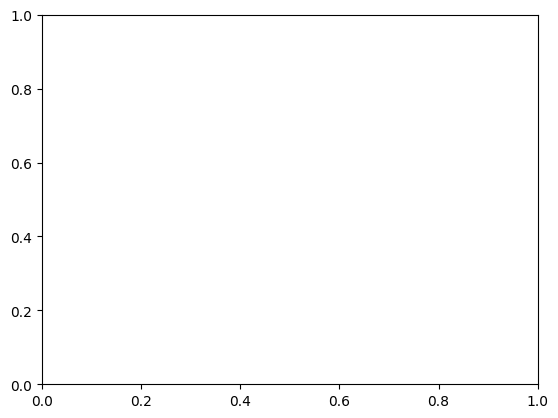

In [2]:
from scipy.interpolate import interp1d # scipyのモジュールを使う

def spline_interp(in_x, in_y):
    out_x = np.linspace(np.min(in_x), np.max(in_x), np.size(in_x)*100) # もとのxの個数より多いxを用意
    func_spline = interp1d(in_x, in_y, kind='cubic') # cubicは3次のスプライン曲線
    out_y = func_spline(out_x) # func_splineはscipyオリジナルの型

    return out_x, out_y


for image_landmark in data[0:5]:
    fig, ax = plt.subplots(1)
    # ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
    image_name = image_landmark[0]
    
    x_coordinates = image_landmark[1::2]
    y_coordinates = image_landmark[2::2]   

    x_np = np.array(x_coordinates)
    y_np = np.array(y_coordinates)
     
    # x_np, x_np = spline_interp(x_np, y_np)
    
    # for i, txt in enumerate(x_np):
    #     ax.annotate(i, (x_np[i], y_np[i]),color="blue")
    
    # landmarks = list(zip(x_coordinates, y_coordinates))
    
    img = Image.open(f"{dataset_img_path}/{image_name}")
    
    ax.imshow(img) 
    
    # plt.plot(x_np, y_np,color='red',markersize=1)  # 輪郭
    
    for p in range(len(x_coordinates)):
        plt.plot(x_np[p], y_np[p], 'r.')
        plt.text(x_np[p], y_np[p], f"{p}")

    
    
    # plt.xlabel('x')
    # plt.ylabel('y')
    plt.title('Coordinates')
    plt.grid(True)
    # plt.gca().invert_yaxis()
    
    
    # plt.savefig("line.png")
    
    plt.show()
    
